# Lab - 05 Multiple Linear Regression with the California Housing Dataset
**Larger real-world dataset** 
    **20,640 samples**, each with **eight numerical features**
	* Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions, Statistics and Probability Letters, 33 (1997) 291-297. Submitted to the StatLib Datasets Archive by Kelley Pace (kpace@unix1.sncc.lsu.edu). [9/Nov/99]. 
* Perform **multiple linear regression** using **all eight numerical features** 
    * Make **more sophisticated housing price predictions** than if we were to use only a **single feature** or a **subset of the features**
* **`LinearRegression`** estimator performs **multiple linear regression** by default

<hr style="height:2px; border:none; color:black; background-color:black;">

## Loading the Dataset
* The dataset has **20,640 samples**—**one per block group**—with **eight features** each:
	* **median income**—in tens of thousands, so 8.37 would represent $83,700
	* **median house age**—in the dataset, the maximum value for this feature is 52
	* **average number of rooms** 
	* **average number of bedrooms** 
	* **block population**
	* **average house occupancy**
	* **house block latitude**
	* **house block longitude**

* **Target** &mdash; **median house value** in hundreds of thousands, so 3.55 would represent \$355,000
    * **Maximum** for this feature is**&nbsp;5** for **\$500,000** 
* Reasonable to expect **more bedrooms**, **more rooms** or **higher income** would mean **higher house value**
* **Combine all numeric features to make predictions**
    * More likely to get **more accurate predictions** than with simple linear regression

### Q1. Load the Data 

* Use `sklearn.datasets` function **`fetch_california_housing`** 
*     Add `%matplotlib inline` to enable Matplotlib in this notebook.

In [98]:
#Brian Conway
#Agustin Lopez
#inline command as usual
%matplotlib inline

In [99]:
from sklearn import datasets#Needed for .fetch_california_housing
import numpy as np

### Q2. Display the Dataset’s Description

In [100]:
housing = datasets.fetch_california_housing()#Not fetched as a df because we're gonna make it one with pandas later
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

### Q3. From the description above indentify and confirm number of **samples/features**, number of **targets**, and **feature names**

In [101]:
#Feature names
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [102]:
print("The number of samples and features is", housing.data.shape)

The number of samples and features is (20640, 8)


In [103]:
print("The number of targets are", housing.data.shape[0])

The number of targets are 20640


In [104]:
print("The feature names of the data is", housing.feature_names)

The feature names of the data is ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


### Q4.1
* Import Pandas
* Set 4 digit precision for floats
* Load the dataset as a DataFrame
* Include an instruction to add a **`DataFrame` column** called "MedHouseValue" for **median house values**

In [105]:
import pandas as pd

In [106]:
#Your code
#For setting 4 digit precision to floats is adjusting the format of decimals to be specifically .1234
pd.options.display.float_format = '{:.4f}'.format
#TODO: Come back to this its not displaying the decimals the way I want we want it go UP TO 4 decimals but it can be less, specifically for Q4.2

In [107]:
#Loading housing data set into a pandas dataframe

housing_df = pd.DataFrame(housing.data, columns = housing.feature_names)
#rounding the entire dataset to 4 decimals
housing_df = housing_df.round(4)

housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0000,6.9841,1.0238,322.0000,2.5556,37.8800,-122.2300
1,8.3014,21.0000,6.2381,0.9719,2401.0000,2.1098,37.8600,-122.2200
2,7.2574,52.0000,8.2881,1.0734,496.0000,2.8023,37.8500,-122.2400
3,5.6431,52.0000,5.8174,1.0731,558.0000,2.5479,37.8500,-122.2500
4,3.8462,52.0000,6.2819,1.0811,565.0000,2.1815,37.8500,-122.2500


In [108]:
#Adding a new column called MedHouseValue that contains the target values of our data set
housing_df = housing_df.assign(MedHouseValue = housing.target)

### Q4.2
* display the first few columns

In [109]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0000,6.9841,1.0238,322.0000,2.5556,37.8800,-122.2300,4.5260
1,8.3014,21.0000,6.2381,0.9719,2401.0000,2.1098,37.8600,-122.2200,3.5850
2,7.2574,52.0000,8.2881,1.0734,496.0000,2.8023,37.8500,-122.2400,3.5210
3,5.6431,52.0000,5.8174,1.0731,558.0000,2.5479,37.8500,-122.2500,3.4130
4,3.8462,52.0000,6.2819,1.0811,565.0000,2.1815,37.8500,-122.2500,3.4220


In [110]:
#Your code

### Q4.3
* Calculate **`DataFrame`’s summary statistics**

In [111]:
#describe method, in other words
housing_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
count,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000
mean,3.8707,28.6395,5.4290,1.0967,1425.4767,3.0707,35.6319,-119.5697,2.0686
std,1.8998,12.5856,2.4742,0.4739,1132.4621,10.3860,2.1360,2.0035,1.1540
min,0.4999,1.0000,0.8462,0.3333,3.0000,0.6923,32.5400,-124.3500,0.1500
25%,2.5634,18.0000,4.4407,1.0061,787.0000,2.4298,33.9300,-121.8000,1.1960
50%,3.5348,29.0000,5.2291,1.0488,1166.0000,2.8181,34.2600,-118.4900,1.7970
75%,4.7432,37.0000,6.0524,1.0995,1725.0000,3.2823,37.7100,-118.0100,2.6472
max,15.0001,52.0000,141.9091,34.0667,35682.0000,1243.3333,41.9500,-114.3100,5.0000


### Q5.1
* To make our visualizations clearer, let’s use **`DataFrame` method **`sample`**** to **randomly select 10% of the 20,640 samples** for graphing

In [112]:
#The replace parametere when set to true allows for the same row to be selected more than once
house_sample = housing_df.sample(frac=0.10, replace= False)
house_sample

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
17740,4.9097,17.0000,5.3659,1.0488,431.0000,3.5041,37.2800,-121.7600,2.4100
4039,8.7172,32.0000,7.6934,1.1277,769.0000,2.8066,34.1600,-118.4800,5.0000
923,9.7194,9.0000,8.3063,0.9763,1981.0000,3.3519,37.4900,-121.8900,5.0000
422,6.7138,42.0000,6.3906,1.0268,1031.0000,2.3013,37.8900,-122.2500,3.6860
5023,4.8125,48.0000,6.7643,1.1279,919.0000,3.0943,33.9900,-118.3400,1.7050
...,...,...,...,...,...,...,...,...,...
3839,2.6364,22.0000,3.5874,0.9930,1254.0000,2.1923,34.1800,-118.4300,2.7110
9202,2.3565,11.0000,5.3358,1.1062,820.0000,2.0247,37.3200,-119.6500,1.2230
13650,1.9926,37.0000,4.1435,1.0043,611.0000,2.6565,34.0800,-117.3100,0.8150
20481,3.7188,27.0000,5.0486,0.9444,467.0000,3.2431,34.2800,-118.7000,2.5000


### Q5.2
* Display **scatter plots** of several **features** Note: use for loop
* Each shows **feature** on **x-axis** and **median home value** on **y-axis**

In [113]:
import matplotlib.pyplot as plt

In [114]:
import seaborn as sns

In [115]:
sns.set_style('whitegrid')                                    

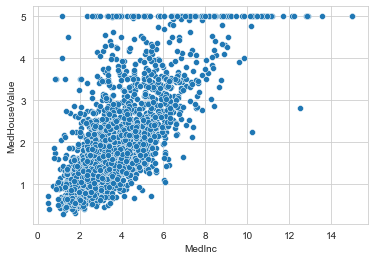

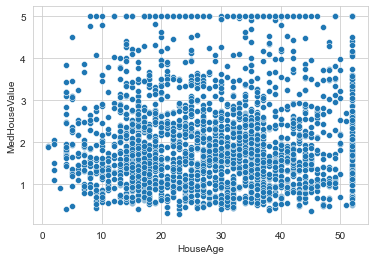

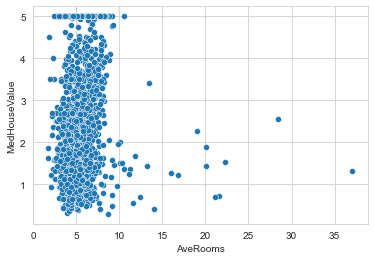

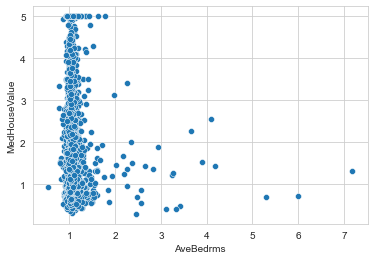

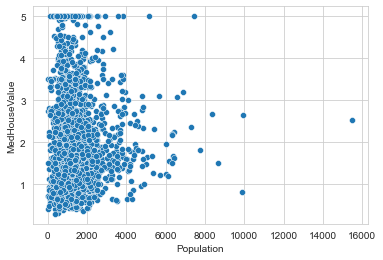

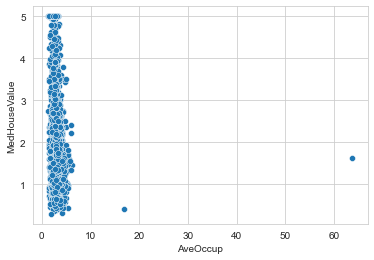

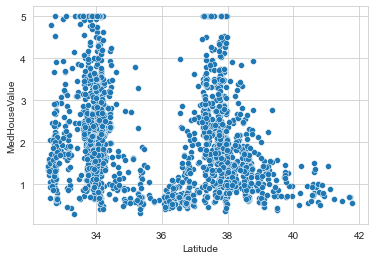

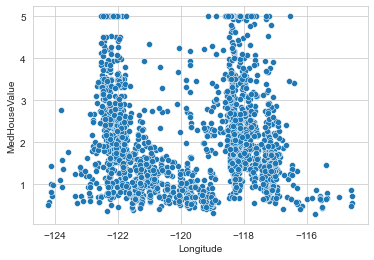

In [147]:
#Your code
#For loop, graphing then showing all the feature in matplotlib
for feature in housing.feature_names:
  plt.figure(feature)
  this_plot = sns.scatterplot(data=house_sample, x=feature, y='MedHouseValue')
  plt.plot(data = this_plot)

plt.show()


### Q5.3
* Document the interesting trends that you notice in these graphs.
You can notice how between the spikes that occur between LA and San Fran, the curve is gradually downward, but skewed in an approximate shape similar to 1/x, this is because Oakland, the third largest city in CA, is across the bay and closer to San Francisco than LA.

* Some **interesting things** to notice in these graphs:
	* **Latitude and longitude graphs** each have **two areas** of especially significant density&mdash;**greater Los Angeles** and **greater San Francisco** areas where house prices tend to be higher
    * Each graph shows a **horizontal line of dots at the y-axis value 5**, which represents the [**maximum median house value \$500,000** listed in the 1990 census form](https://www.census.gov/prod/1/90dec/cph4/appdxe.pdf)
    * **`HouseAge` graph** shows a **vertical line of dots** at the **x-axis value 52**
        * **Highest home age** on the 1990 census form was **52**

<!-- ![California Housing Dataset scatterplot of Median House Value vs. Median Income](./ch14images/medincome.png "California Housing Dataset scatterplot of Median House Value vs. Median Income")
 ![California Housing Dataset scatterplot of Median House Value vs. House Age](./ch14images/houseage.png "California Housing Dataset scatterplot of Median House Value vs. House Age")
 ![California Housing Dataset scatterplot of Median House Value vs. Average Rooms](./ch14images/averooms.png "California Housing Dataset scatterplot of Median House Value vs. Average Rooms")
 ![California Housing Dataset scatterplot of Median House Value vs. Average Bedrooms](./ch14images/avebedrooms.png "California Housing Dataset scatterplot of Median House Value vs. Average Bedrooms")
 ![California Housing Dataset scatterplot of Median House Value vs. Population](./ch14images/population.png "California Housing Dataset scatterplot of Median House Value vs. Population")
 ![California Housing Dataset scatterplot of Median House Value vs. Average Occupancy](./ch14images/aveoccupancy.png "California Housing Dataset scatterplot of Median House Value vs. Average Occupancy")
 ![California Housing Dataset scatterplot of Median House Value vs. Lattitude](./ch14images/lattitude.png "California Housing Dataset scatterplot of Median House Value vs. Lattitude")
 ![California Housing Dataset scatterplot of Median House Value vs. Longitude](./ch14images/longitude.png "California Housing Dataset scatterplot of Median House Value vs. Longitude")<hr style="height:2px; border:none; color:black; background-color:black;"> -->

## Q6 Split the Data for Training and Testing Using `train_test_split`  

In [117]:
from sklearn.model_selection import train_test_split

In [118]:

housing['target']

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [119]:
housing.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [120]:
#Your code
#Famous line of code again,  not setting a random state so values will differ from profs
X_train, X_test, Y_train, Y_test = train_test_split(housing['data'], housing['target'], test_size = 0.25)

In [121]:
#printing tuples of the split
X_train.shape

(15480, 8)

In [148]:

X_test.shape

(5160, 8)

## Train the Model 
* **`LinearRegression`** tries to use **all** features in a dataset’s `data` array
    * **error** if any features are **categorical**  
    * Categorical data must be preprocessed into numerical data or excluded
* **Scikit-learn’s bundled datasets** are already in the **correct format** for training

In [123]:
from sklearn.linear_model import LinearRegression

In [124]:
#Finding linear regression then fitting it on training data
linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=Y_train)

LinearRegression()

In [125]:
linear_regression

LinearRegression()

In [126]:
#Your code
#x_test is to make our predicted values, y_test our actual as usual
predicted = linear_regression.predict(X_test)
predicted



array([2.5347154 , 2.02278348, 2.70691691, ..., 1.99596551, 3.3853595 ,
       2.0765624 ])

### Q9 Record your observation

In [149]:
# Document Your answer

#A bit confused on this part, I think you just want us to print our m values for the equation?
#Then our intercept too naturally
m_values=linear_regression.coef_
print(m_values)

[ 4.32779724e-01  9.13304482e-03 -1.05107764e-01  6.18270768e-01
 -3.64486043e-06 -3.41598309e-03 -4.27412336e-01 -4.41833324e-01]


In [128]:
linear_regression.intercept_

-37.559482462672484

In [129]:
* **Separate coefficients** for each feature (stored in `coeff_`) and **one intercept** (stored in `intercept_`) 

SyntaxError: invalid syntax (<ipython-input-129-40df8025ac2b>, line 1)

In [ ]:
linear_regression.intercept_

* Can use coefficient values in following equation to **make predictions**:

\begin{equation}
y = m_1 x_1 + m_2 x_2 + ... + m_n x_n + b
\end{equation}

* <em>m</em><sub>1</sub>, <em>m</em><sub>2</sub>, …, <em>m</em><sub><em>n</em></sub> are the **feature coefficients**
* <em>b</em> is the **intercept**
* <em>x</em><sub>1</sub>, <em>x</em><sub>2</sub>, …, <em>x</em><sub><em>n</em></sub> are **feature values** (the **independent variables**)
* <em>y</em> is the **predicted value** (the **dependent variable**)
   

## Q10 Test the Model 
* Use the estimator’s `predict` method 
* Display first 5 predictions and first five targets(expected)

In [150]:
#Showing both predicted and expected aka actualy values next to one another
for p,e in zip(predicted[:5], Y_test[:5]):
  print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 2.53, expected: 2.32
predicted: 2.02, expected: 1.20
predicted: 2.71, expected: 3.12
predicted: 2.48, expected: 4.54
predicted: 0.99, expected: 0.58


In [131]:
#Your answer # first 5 predictions

In [132]:
#Your answer # first five targets 

* In **classification**, **predictions** were **distinct classes** that **matched existing classes** in the dataset
* In **regression**, it’s **tough to get exact predictions**, because you have **continuous outputs**
    * Every possible value of <em>x</em><sub>1</sub>, <em>x</em><sub>2</sub> … <em>x</em><sub><em>n</em></sub> in the following calculation predicts a value

\begin{equation}
y = m_1 x_1 + m_2 x_2 + ... + m_n x_n + b
\end{equation}


##  Visualize the Expected vs. Predicted Prices 
### Q11.1 Create a `DataFrame` containing columns for the expected and predicted values:

In [133]:
#Your answer
pred_Test_df = pd.DataFrame(predicted, columns=['Predicted'] )
pred_Test_df = pred_Test_df.assign(Expected = Y_test)

In [134]:
pred_Test_df

,Predicted,Expected
0,2.5347,2.3200
1,2.0228,1.2040
2,2.7069,3.1190
3,2.4833,4.5410
4,0.9919,0.5840
...,...,...
5155,1.8786,3.7500
5156,2.2210,3.3890
5157,1.9960,1.5000
5158,3.3854,3.2750


### Q11.2 Visualize the Expected vs. Predicted Prices
* Plot the data as a scatter plot with the **expected (target) prices** along the x-axis and the **predicted prices** along the **y**-axis: 
* Set the **<em>x</em>**- and **<em>y</em>**-axes’ limits to use the same scale along both axes:
* Plot a line that represents **perfect predictions** (this is **not** a regression line). 
    * The call to **`plot`** displays a line between the points representing the lower-left corner of the graph (`start, start`) and the upper-right corner of the graph (`end, end`). 
    * The third argument (`'k--'`) indicates the line’s style. 
    * The letter `k` represents the color black, and the `--` indicates that plot should draw a dashed line: 
* If every predicted value were to match the expected value, then all the dots would be plotted along the dashed line. 

In [135]:
predict = (lambda x: linear_regression.coef_ * x + linear_regression.intercept_)

In [136]:
predict(5)

array([-35.39558384, -37.51381724, -38.08502128, -34.46812862,
       -37.55950069, -37.57656238, -39.69654414, -39.76864908])

In [137]:
x = np.array([min(pred_Test_df.Expected.values), max(pred_Test_df.Expected.values)])
x

array([0.14999, 5.00001])

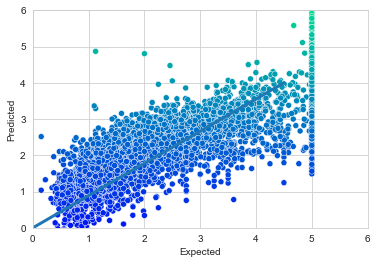

In [152]:

axes = sns.scatterplot(data=pred_Test_df, x = 'Expected', y ='Predicted', hue = 'Predicted', palette= 'winter', legend = False)
axes.set_ylim(0,6)
axes.set_xlim(0,6)
#drawing a line that looks like the one of best fit visually
#plt.plot([first ordered pair],[second ordered pair], linewidth=whatever)
plt.plot([0,4.5],[0,4],linewidth=3)


# x = np.array([min(pred_Test_df.Expected.values), max(pred_Test_df.Expected.values)])

# y = predict(x)

# line = plt.plot(x,y)



In [139]:
#Your answer

* Document your observation on your predictions
* Answer:
* Appears that as the expected median house value increases, more of the predicted values fall below the line. 
* So the model **seems to predict** lower median house values as the **expected** median house value increases. 

Because of that, a linear regression is never going to be the mathmatically closest function to model this dataset. A logarithmic equation would closely model this based on the shape of the data. It seems this is a case where the linear nature of linear regression is a weakness.


## Regression Model Metrics
### Q11.3 Compute the mtrics
* **Metrics for regression estimators** include **coefficient of determination** (**$R^{2}$ score**; 0.0-1.0)
    * **1.0** &mdash; estimator **perfectly predicts** the **dependent variable’s value**, given independent variables' values
    * **0.0** &mdash; **model cannot make predictions with any accuracy**, given independent variables’ values 
* Calculate **$R^{2}$ score** with arrays representing the **expected** and **predicted results**

In [153]:
from sklearn import metrics
from sklearn.metrics import r2_score

#Famous line of code, test with our prediction vs actual/expected values
score=r2_score(predicted,Y_test)
score

0.34190280415547714

In [141]:
#Your answer

## Choosing the Best Model ** For Graduate Students
### Bonus points will be awarded for Undergraduate students attempting this part of the lab
* **Try several estimators** to determine whether any **produces better results** than `LinearRegression` 
* [Information about estimators used here](https://scikit-learn.org/stable/modules/linear_model.html)

In [154]:
from sklearn.linear_model import ElasticNet, Lasso, Ridge

#Might get to this extra tomorrow

In [143]:
#Your code

### Run the estimators using **k-fold cross-validation** 

In [144]:
from sklearn.model_selection import KFold, cross_val_score

In [145]:
#Your code

* Document your observation.
#Your answer

***End***